## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.12f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 6.0111 - acc: 0.2681 - val_loss: 5.8232 - val_acc: 0.3342
Epoch 2/50
50000/50000 [==============================] - 4s 73us/step - loss: 5.7279 - acc: 0.3641 - val_loss: 5.6551 - val_acc: 0.3703
Epoch 3/50
50000/50000 [==============================] - 4s 76us/step - loss: 5.5771 - acc: 0.3941 - val_loss: 5.5115 - val_acc: 0.4038
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 5.4518 - acc: 0.4155 - val_loss: 5.4025 - val_acc: 0.4221
Epoch 5/50
50000/50000 [==============================] - 5s 98us/step - loss: 5.3426 - acc: 0.4323 - val_loss: 5.3047 - val_acc: 0.4277
Epoch 6/50
50000/50000 [==============================] - 4s 77us/step - loss: 5.2418 - acc: 0.4435 - val_loss: 5.2035 - val_acc: 0.4430
Epoch 7/50
50000/50000 [==============================] - 3s 70us/step - loss: 5.1480 - acc: 0.4543 - val_loss: 5.1359 - val_acc

Epoch 2/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.8101 - acc: 0.3623 - val_loss: 1.7564 - val_acc: 0.3826
Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7164 - acc: 0.3971 - val_loss: 1.6867 - val_acc: 0.4069
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6572 - acc: 0.4163 - val_loss: 1.6353 - val_acc: 0.4266
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6097 - acc: 0.4346 - val_loss: 1.6000 - val_acc: 0.4378
Epoch 6/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5725 - acc: 0.4470 - val_loss: 1.5735 - val_acc: 0.4451
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5386 - acc: 0.4599 - val_loss: 1.5342 - val_acc: 0.4564
Epoch 8/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.5090 - acc: 0.4705 - val_loss: 1.5204 - val_acc: 0.4625
Epoch 9/50
50000/50000 [============

50000/50000 [==============================] - 7s 146us/step - loss: 1.7339 - acc: 0.3945 - val_loss: 1.6977 - val_acc: 0.4056
Epoch 4/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6724 - acc: 0.4138 - val_loss: 1.6421 - val_acc: 0.4221
Epoch 5/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6229 - acc: 0.4317 - val_loss: 1.6005 - val_acc: 0.4389ac
Epoch 6/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5818 - acc: 0.4455 - val_loss: 1.5788 - val_acc: 0.4433
Epoch 7/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5492 - acc: 0.4554 - val_loss: 1.5563 - val_acc: 0.4504
Epoch 8/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5185 - acc: 0.4667 - val_loss: 1.5291 - val_acc: 0.4635
Epoch 9/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.4900 - acc: 0.4779 - val_loss: 1.5001 - val_acc: 0.468805 - acc: 0.47
Epoch 10/50
50000/50000 [====

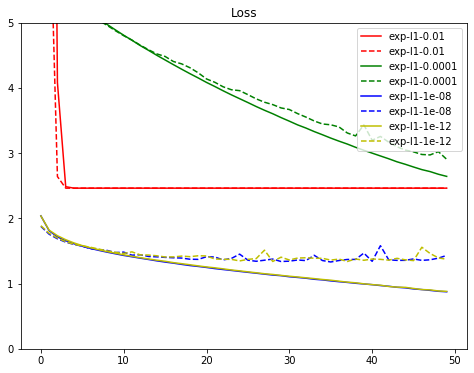

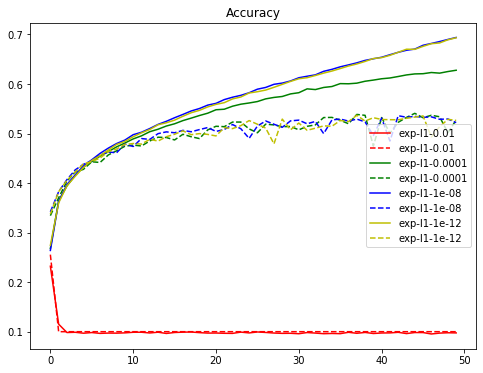

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# L1 and L2

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-8, 1e-12]
L2_EXP = [1e-8, 1e-12]

In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1 in L1_EXP:
    for l2 in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with L1 Regulizer = %.12f" % (l1))
        print("Experiment with L2 Regulizer = %.12f" % (l2))
        model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1, l2_ratio=l2)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-l1-%12s, exp-l2-%12s" % (str(l1), str(l2))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with L1 Regulizer = 0.000000010000
Experiment with L2 Regulizer = 0.000000010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples,

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.0167 - acc: 0.2736 - val_loss: 1.8629 - val_acc: 0.3404
Epoch 2/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.8029 - acc: 0.3665 - val_loss: 1.7643 - val_acc: 0.3747
Epoch 3/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7238 - acc: 0.3953 - val_loss: 1.6898 - val_acc: 0.4074
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.6665 - acc: 0.4154 - val_loss: 1.6526 - val_acc: 0.4206
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6214 - acc: 0.4319 - val_loss: 1.6052 - val_acc: 0.4369
Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5819 - acc: 0.4447 - val_loss: 1.5722 - val_acc: 0.4478
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5483 - acc: 0.4555 - val_loss: 1.5471 - val_acc

50000/50000 [==============================] - 4s 90us/step - loss: 2.0487 - acc: 0.2681 - val_loss: 1.8605 - val_acc: 0.3451
Epoch 2/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.8055 - acc: 0.3664 - val_loss: 1.7570 - val_acc: 0.3822
Epoch 3/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.7219 - acc: 0.3967 - val_loss: 1.7110 - val_acc: 0.4004
Epoch 4/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.6641 - acc: 0.4180 - val_loss: 1.6467 - val_acc: 0.4240
Epoch 5/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6173 - acc: 0.4330 - val_loss: 1.6026 - val_acc: 0.4359
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5782 - acc: 0.4457 - val_loss: 1.5762 - val_acc: 0.4466
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5452 - acc: 0.4571 - val_loss: 1.5453 - val_acc: 0.4566
Epoch 8/50
50000/50000 [=======================

Epoch 2/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.8021 - acc: 0.3709 - val_loss: 1.7541 - val_acc: 0.3795
Epoch 3/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.7213 - acc: 0.3963 - val_loss: 1.6852 - val_acc: 0.4121
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6612 - acc: 0.4170 - val_loss: 1.6384 - val_acc: 0.4293
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6135 - acc: 0.4336 - val_loss: 1.6001 - val_acc: 0.4376
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5731 - acc: 0.4491 - val_loss: 1.5821 - val_acc: 0.4468
Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5403 - acc: 0.4580 - val_loss: 1.5530 - val_acc: 0.4534
Epoch 8/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5092 - acc: 0.4720 - val_loss: 1.5141 - val_acc: 0.4675
Epoch 9/50
50000/50000 [==========

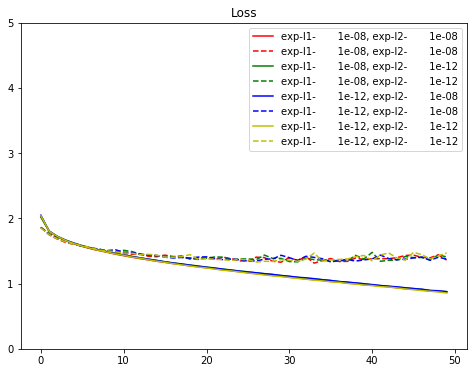

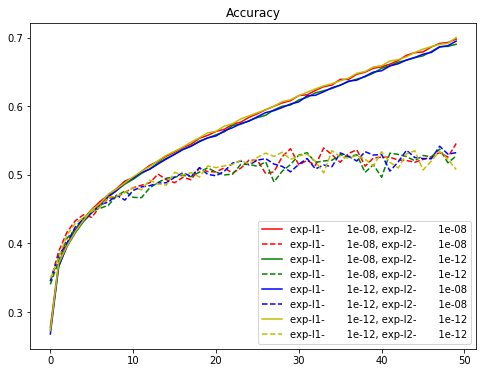

In [20]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()